In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmm_discretization import Discrete_Model_Optimization
from data_collection import generate_parameters, paper_experiments
from means_and_covars import means_opts, covars_opts

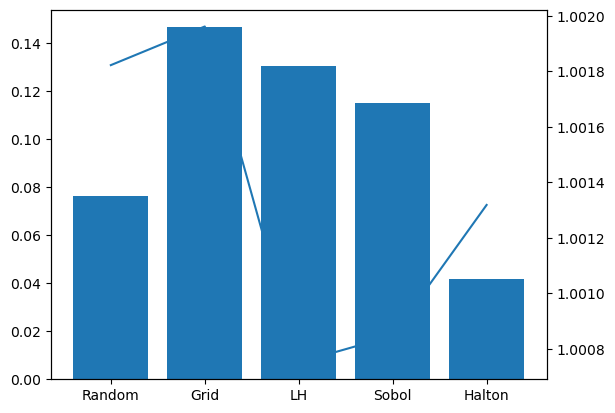

In [37]:
_, axes = plt.subplots()
axes2 = axes.twinx()
axes.bar(disc_methods, lss_values)
axes2.plot(disc_methods, lss_values2)

<BarContainer object of 5 artists>

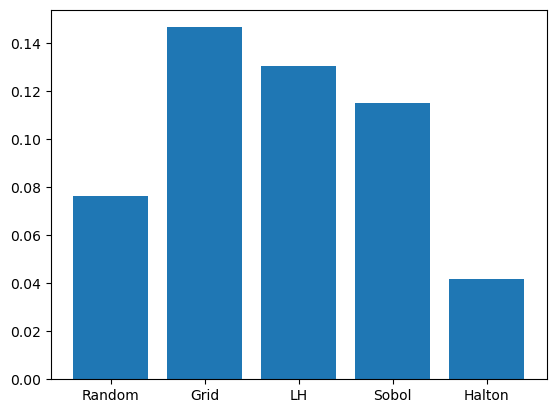

In [32]:
disc_methods = ['Random', 'Grid', 'LH', 'Sobol', 'Halton']
lss_values = losses_all[0:5]
lss_values2 = losses_all[5:10]
plt.bar(disc_methods, lss_values)

### Analyzing results

In [2]:
df2h_cols = ['2D with 2^6', '2D with 2^8', '3D with 2^6', '3D with 2^8', '4D with 2^6', '4D with 2^8', '6D with 2^6', '6D with 2^8','8D with 2^6', '8D with 2^8', '10D with 2^6', '10D with 2^8']
df2h_cols2 = ['Random MSE', 'Grid MSE', 'Latin Hypercube MSE', 'Sobol MSE', 'Halton MSE', 'Random KLD', 'Grid KLD', 'Latin Hypercube KLD', 'Sobol KLD', 'Halton KLD']
df2h = pd.read_csv('test_results/Results_ND_2h.csv')
df2h.pop(df2h.columns[0])
df2h = df2h.T
df2h.columns = df2h_cols
df2h_loss = df2h.iloc[list(range(0, 40, 4))]
df2h_score = df2h.iloc[list(range(1, 40, 4))]
df2h_acc = df2h.iloc[list(range(2, 40, 4))]
df2h_discr = df2h.iloc[list(range(3, 40, 4))]
dfs2h = [df2h_loss, df2h_score, df2h_acc, df2h_discr]
dfs2h_names = ['Loss', 'Score', 'Acc', 'Discrepancy']
for df, name in zip(dfs2h, dfs2h_names):
    df = df.round(decimals=6)
    df = df.T
    df.columns = df2h_cols2
    df.to_csv(f'test_results/{name}_2h.csv')

In [3]:
df3h_cols = ['2D with 2^6', '2D with 2^8', '3D with 2^6', '3D with 2^8', '4D with 2^6', '4D with 2^8', '6D with 2^6', '6D with 2^8','8D with 2^6', '8D with 2^8', '10D with 2^6', '10D with 2^8']
df3h_cols2 = ['Random MSE', 'Grid MSE', 'Latin Hypercube MSE', 'Sobol MSE', 'Halton MSE', 'Random KLD', 'Grid KLD', 'Latin Hypercube KLD', 'Sobol KLD', 'Halton KLD']
df3h = pd.read_csv('test_results/Results_ND_3h.csv')
df3h.pop(df3h.columns[0])
df3h = df3h.T
df3h.columns = df3h_cols
df3h_loss = df3h.iloc[list(range(0, 40, 4))]
df3h_score = df3h.iloc[list(range(1, 40, 4))]
df3h_acc = df3h.iloc[list(range(2, 40, 4))]
df3h_discr = df3h.iloc[list(range(3, 40, 4))]
dfs3h = [df3h_loss, df3h_score, df3h_acc, df3h_discr]
dfs3h_names = ['Loss', 'Score', 'Acc', 'Discrepancy']
for df, name in zip(dfs3h, dfs3h_names):
    df.round(decimals=6)
    df = df.T
    df.columns = df3h_cols2
    df.to_csv(f'test_results/{name}_3h.csv')

In [6]:
def plot_results(metric, dim_list, name):
    disc_methods = ['Random', 'Grid', 'LH', 'Sobol', 'Halton']
    _, axes = plt.subplots(ncols=2, nrows=6, figsize=(10, 15))
    for c, n_dim in enumerate(dim_list):
        axes[c, 0].plot(metric[f'{n_dim}d_6'].iloc[0:5], label='Grid 2^6')
        axes[c, 0].plot(metric[f'{n_dim}d_8'].iloc[0:5], label='Grid 2^8')
        axes[c, 0].set_xticks(np.arange(len(disc_methods)), disc_methods, rotation=0)
        axes[c, 0].set_title(f'MSE {name} for {n_dim} Dimension observations')
        axes[c, 0].set_xlabel('Discretization Method')
        axes[c, 0].set_ylabel(name)
        axes[c, 0].legend()
        axes[c, 1].plot(metric[f'{n_dim}d_6'].iloc[5:10], label='Grid 2^6')
        axes[c, 1].plot(metric[f'{n_dim}d_8'].iloc[5:10], label='Grid 2^8')
        axes[c, 1].set_xticks(np.arange(len(disc_methods)), disc_methods, rotation=0)
        axes[c, 1].set_title(f'KLD {name} for {n_dim} Dimension observations')
        axes[c, 1].set_xlabel('Discretization Method')
        axes[c, 1].set_ylabel(name)
        axes[c, 1].legend()
    plt.tight_layout()
    plt.show()

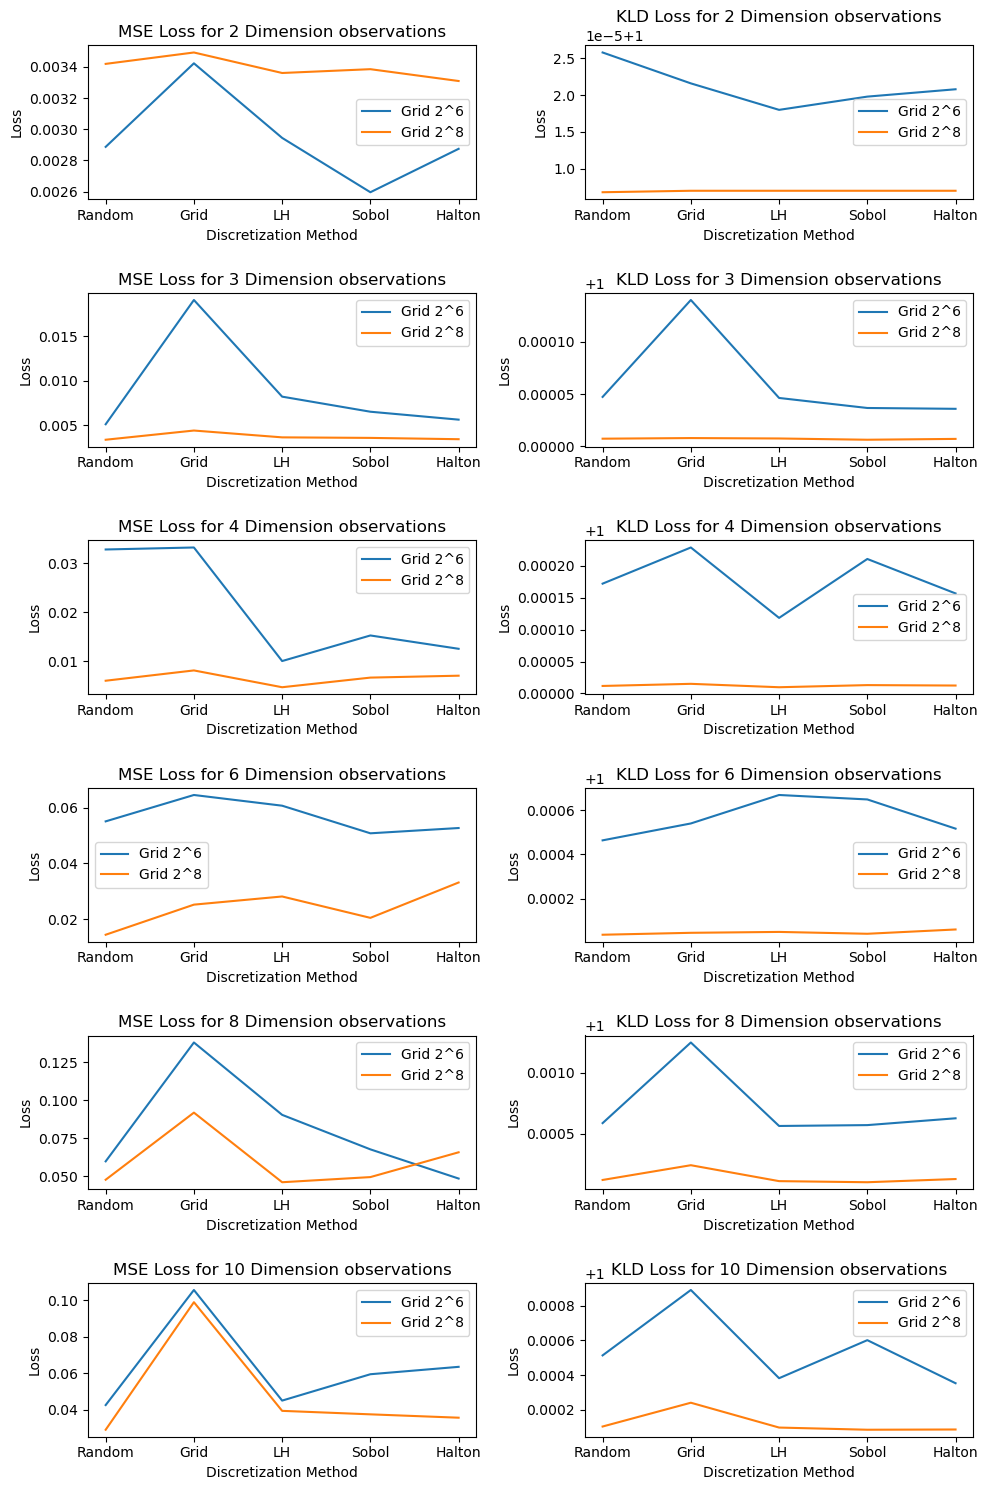

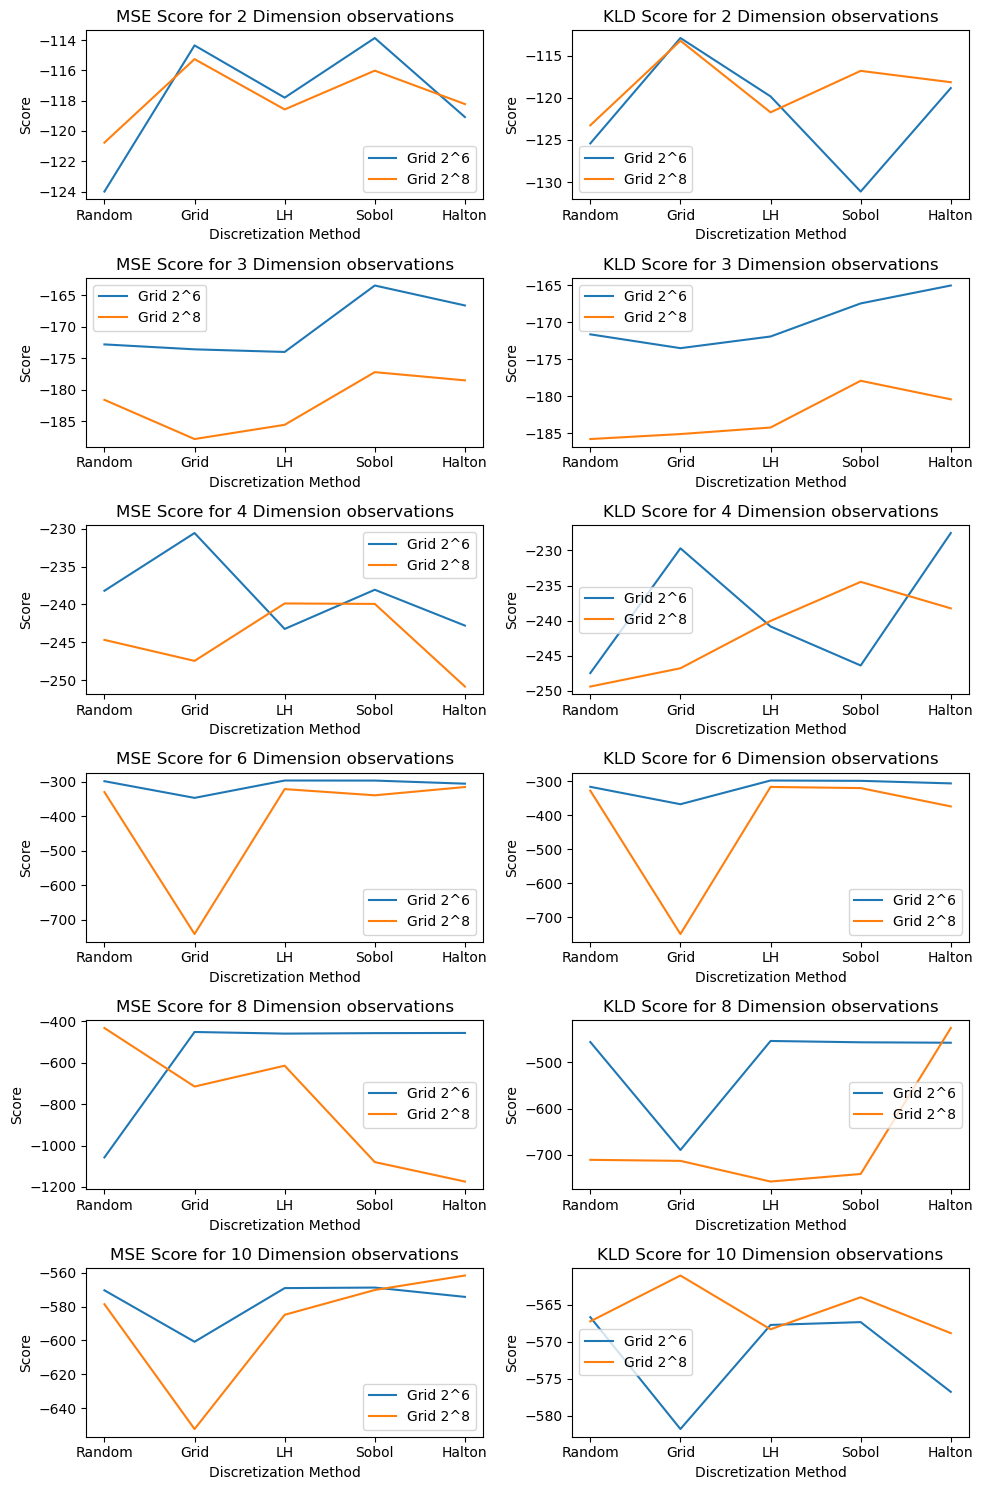

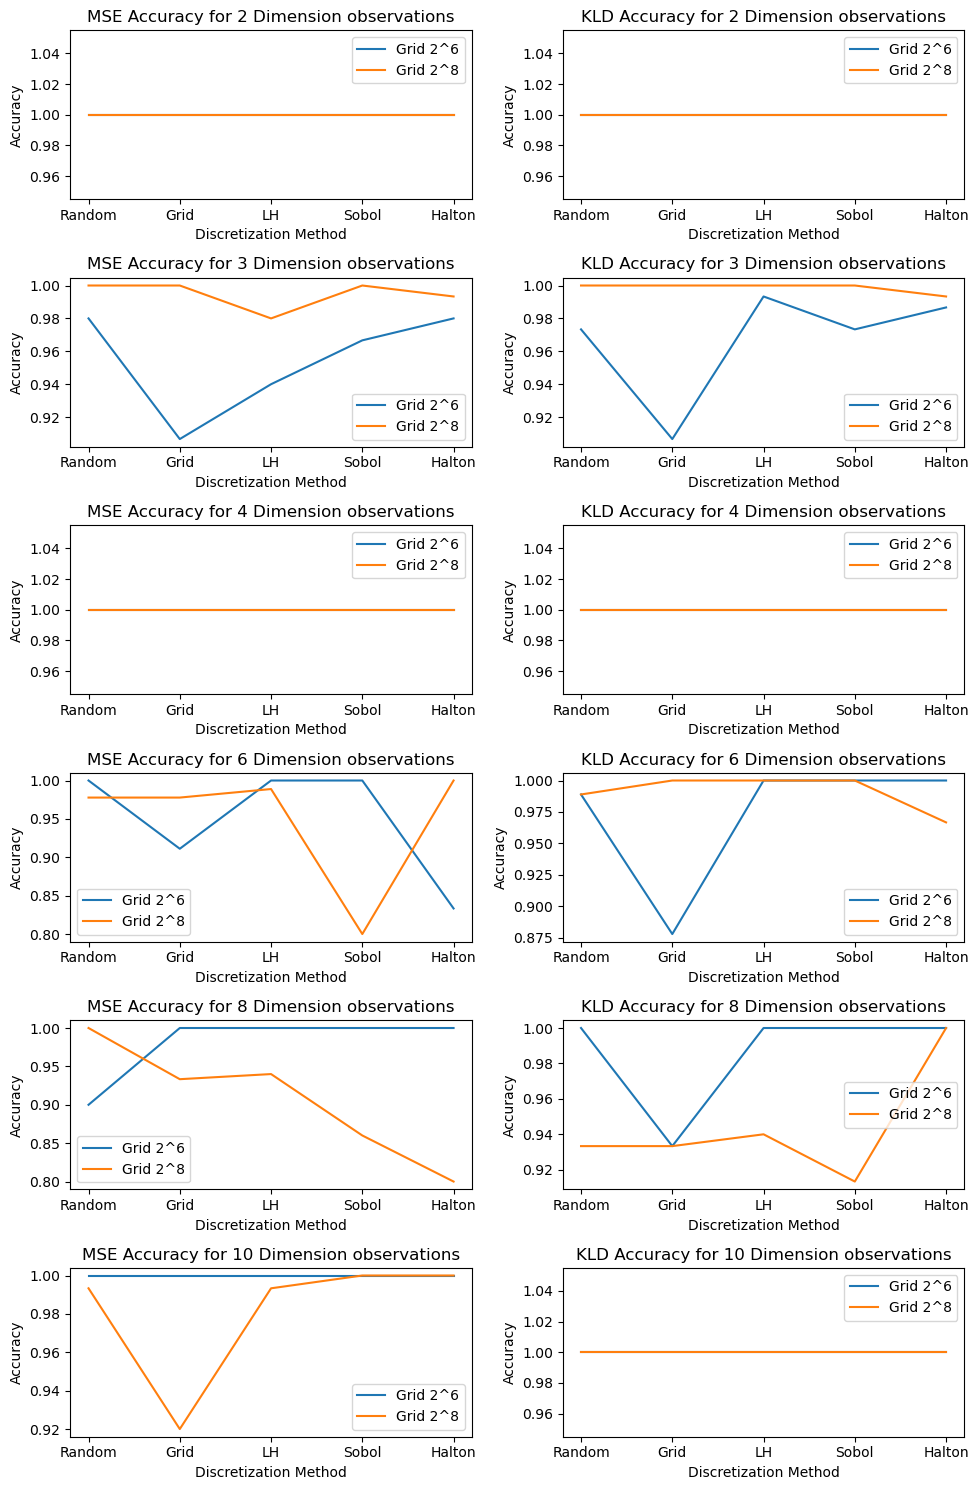

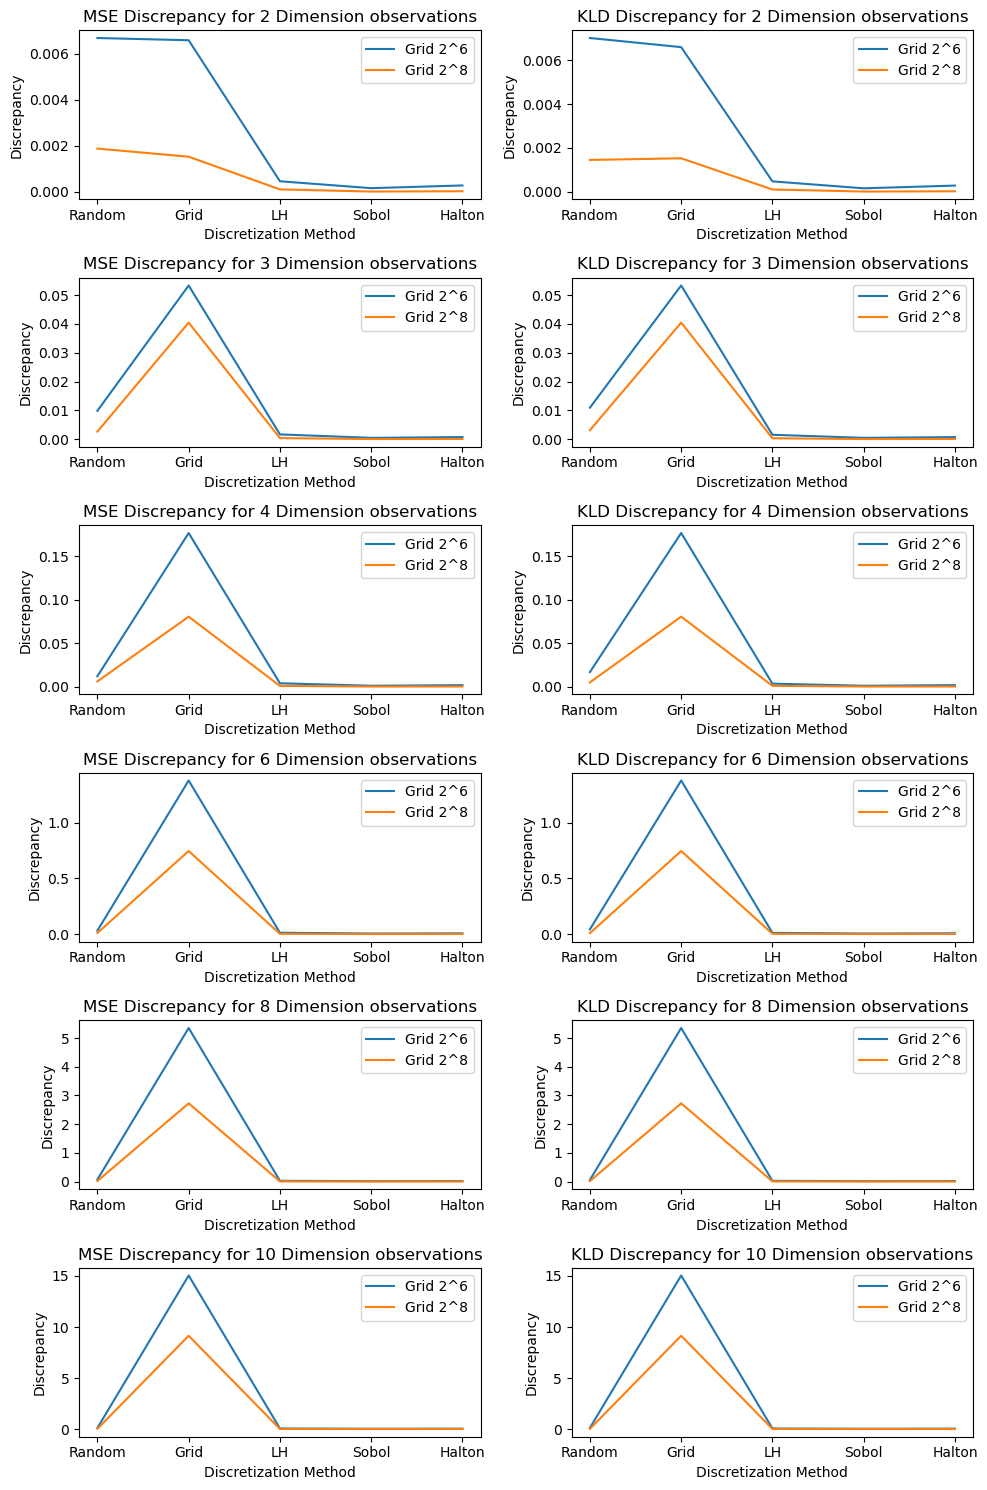

In [7]:
dim_list = [2, 3, 4, 6, 8, 10]
plot_results(df_loss, dim_list, 'Loss')
plot_results(df_score, dim_list, 'Score')
plot_results(df_acc, dim_list, 'Accuracy')
plot_results(df_discr, dim_list, 'Discrepancy')